## Simulación - Error - Varianza

En este ejercicio se crearán datos simulados y se ajustará un modelo de regresión lineal simple.

**1.** Utilizando la función **rnorm**, crear un **vector $X$** que contenga 100 observaciones provenientes
de una distribución **$N$(0, 1).**

**2.** Utilizando la función **rnorm**, crear un **vector $\epsilon$** que contenga 100 observaciones provenientes de una distribución **$N$(0, 0.025).**

**3.** Usando **$X$** y **$\epsilon$**, generar un vector **$Y$** acorde al modelo:
**$Y$** = −1 + 0.5 **$X$** + **$\epsilon$**
¿Cuál es la longitud del vector **$Y$**? ¿Cuáles son los valores de **$\beta_0$** y **$\beta_1$** en el modelo?

**4.** Realizar un **scatterplot** y observar la relacion entre **$X$** e **$Y$**.

**5.** Ajustar un **modelo lineal** para predecir **$Y$** en función de **$X$** utilizando el **método de cuadrados mínimos**. Comparar los valores exactos de **$\beta_0$** y **$\beta_1$** con sus estimaciones **$\hat\beta_0$** y **$\hat\beta_1$**.

**6.** Graficar la **recta de cuadrados mínimos** sobre el gráfico realizado en (d). En otro color graficar
la recta **$Y$** = −1 + 0.5**$X$**.

**7.** Ajustar un **modelo polinomial** que prediga **$Y$** usando **$X$** y **$X^2$**. ¿Encuentra alguna evidencia de que el término cuadrático mejora el ajuste del modelo?

**8.** Repetir los ítems **(1)** a **(6)** modificando los datos generados de manera que haya **menos ruido**
en los datos. Una forma de hacerlo es **disminuyendo** el valor de la **varianza** de la distribución
normal usada para general el término del **error epsilon**.

**9.** Repetir los ítems **(1)** a **(6)** modificando los datos generados de manera que haya **más ruido**
en los datos. Una forma de hacerlo es **aumentando** el valor de la **varianza** de la distribución
normal usada para general el término del **error epsilon**.

**Empezamos setteando una semilla para los números aleatorios:**

In [1]:
set.seed(1)

**1.** Utilizando la función **rnorm**, crear un **vector $X$** que contenga 100 observaciones provenientes
de una distribución **$N$(0, 1).**

**2.** Utilizando la función **rnorm**, crear un **vector $\epsilon$** que contenga 100 observaciones provenientes de una distribución **$N$(0, 0.025).**

**3.** Usando **$X$** y **$\epsilon$**, generar un vector **$Y$** acorde al modelo:
**$Y$** = −1 + 0.5 **$X$** + **$\epsilon$**
¿Cuál es la longitud del vector **$Y$**? ¿Cuáles son los valores de **$\beta_0$** y **$\beta_1$** en el modelo?

In [2]:
x <- rnorm(100)

In [3]:
desvio_estandar = sqrt(0.025)

In [4]:
epsilon <- rnorm(100, mean = 0, sd = desvio_estandar) # sigma_cuadrado es entonces = 0.158113

In [5]:
y = -1+ 0.5 * x + epsilon

In [6]:
length(y)

[1] 100

Observo que $\beta_0$ = -1 y $\beta_1$ = 0.5

**4.** Realizar un **scatterplot** y observar la relación entre **$X$** e **$Y$**.

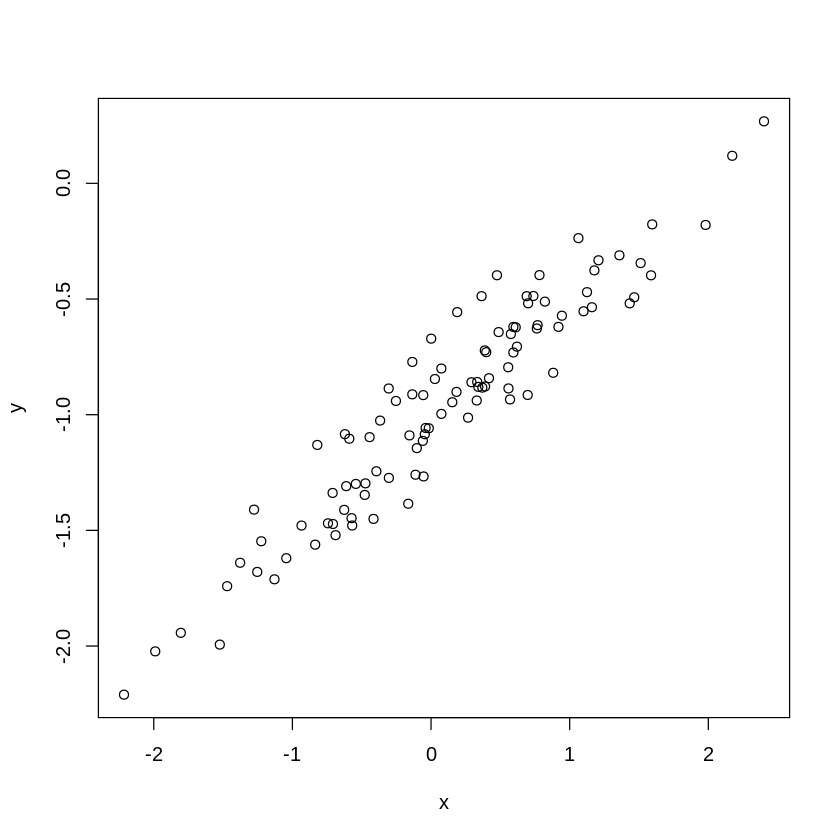

In [7]:
plot(x,y)
p <- recordPlot()

**5.** Ajustar un **modelo lineal** para predecir **$Y$** en función de **$X$** utilizando el **método de cuadrados mínimos**. Comparar los valores exactos de **$\beta_0$** y **$\beta_1$** con sus estimaciones **$\hat\beta_0$** y **$\hat\beta_1$**.

In [8]:
modelo <- lm(y ~ x)

In [9]:
summary(modelo)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29675 -0.09704 -0.02206  0.08529  0.37096 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.00596    0.01534  -65.60   <2e-16 ***
x            0.49983    0.01703   29.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1522 on 98 degrees of freedom
Multiple R-squared:  0.8978,	Adjusted R-squared:  0.8968 
F-statistic: 861.1 on 1 and 98 DF,  p-value: < 2.2e-16


In [10]:
b0 <- summary(modelo)$coefficients[1,1]
b1 <- summary(modelo)$coefficients[2,1]
b0
b1

[1] -1.00596

[1] 0.4998323

Observamos que son estimaciones muy buenas para $\beta_0$ = -1 y $\beta_1$ = 0.5

**6.** Graficar la **recta de cuadrados mínimos** sobre el gráfico realizado en (d). En otro color graficar
la recta **$Y$** = −1 + 0.5**$X$**.

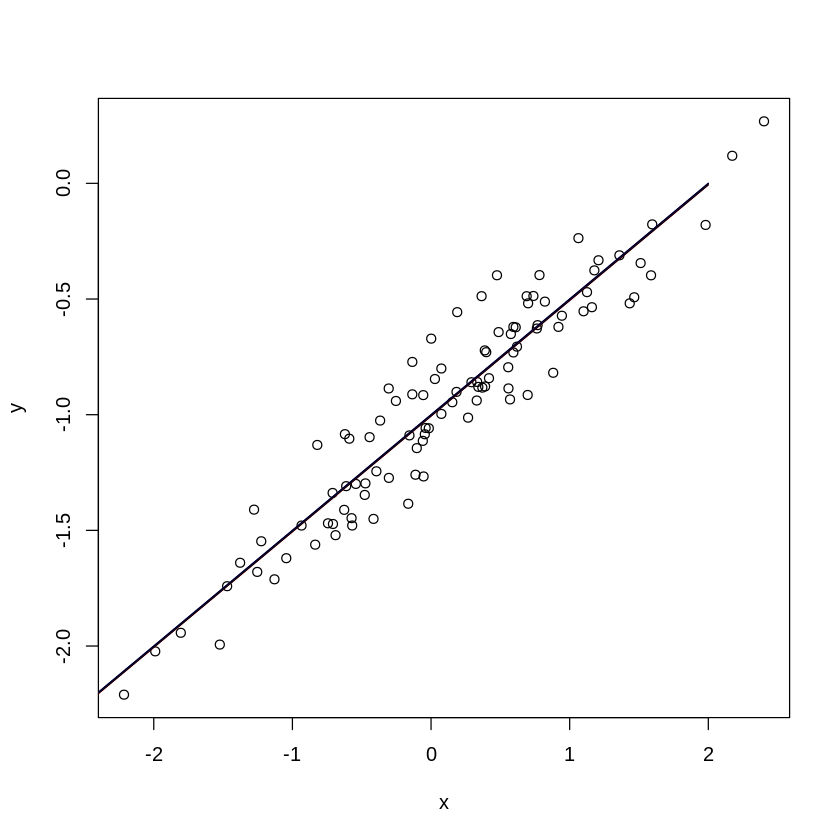

In [11]:
t <- seq(-3,2, 0.1)
recta_estimada<- b1 * t + b0
recta_real_sin_termino_error = 0.5 * t - 1

replayPlot(p)

points(t,recta_estimada, type = "l", ylim = c(-2,0), col = 'red')
lines(t,recta_estimada, type = "l", ylim = c(-2,0))

points(t,recta_real_sin_termino_error, type = "l", ylim = c(-2,0), col = 'blue')
lines(t,recta_real_sin_termino_error, type = "l", ylim = c(-2,0))

**7.** Ajustar un **modelo polinomial** que prediga **$Y$** usando **$X$** y **$X^2$**. ¿Encuentra alguna evidencia de que el término cuadrático mejora el ajuste del modelo?

In [12]:
modelo_cuadratico <- lm(y ~ x + I(x^2))
summary(modelo_cuadratico)


Call:
lm(formula = y ~ x + I(x^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31070 -0.09888 -0.02037  0.09175  0.35892 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.99103    0.01860 -53.273   <2e-16 ***
x            0.50271    0.01707  29.444   <2e-16 ***
I(x^2)      -0.01880    0.01340  -1.403    0.164    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1515 on 97 degrees of freedom
Multiple R-squared:  0.8999,	Adjusted R-squared:  0.8978 
F-statistic: 435.8 on 2 and 97 DF,  p-value: < 2.2e-16


Los ítems 8 y 9 pueden observarse cambiando el valor de $\sigma$ en la celda número 3 de este notebook